In [1]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import plotly as plt
import re
import matplotlib.pyplot as plt
from PIL import Image 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
#lendo o arquivo upado no github 
df = pd.read_csv(r'https://raw.githubusercontent.com/antoniofariass/Data-Analysis/main/Projeto_Emails/emails_processado.csv')

## Questão 1

<AxesSubplot:xlabel='year'>

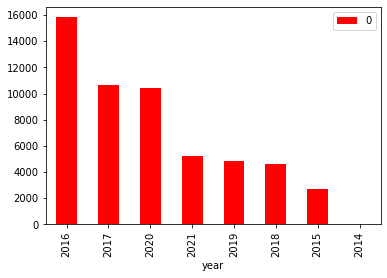

In [3]:
#utilizando do value counts para soma de todos os valores
recebidos_ano = df.value_counts(df['year'])

#transformando a series em data frame
recebidos_ano = pd.DataFrame(recebidos_ano)

#criando o grafico e colocando a cor azul nas barras
recebidos_ano.plot.bar(color=['red'])

<AxesSubplot:xlabel='month'>

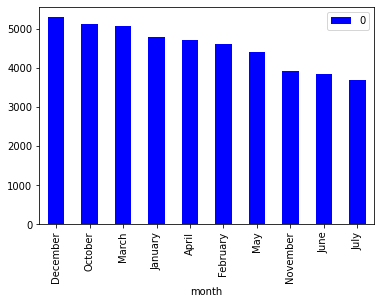

In [4]:
#utilizando do value counts para soma de todos os valores
recebidos_mes = df.value_counts(df['month'])

#transformando a series em data frame
recebidos_mes = pd.DataFrame(recebidos_mes)

#criando o grafico e colocando a cor azul nas barras
recebidos_mes.plot.bar(color = 'blue')

<AxesSubplot:xlabel='dayofweek'>

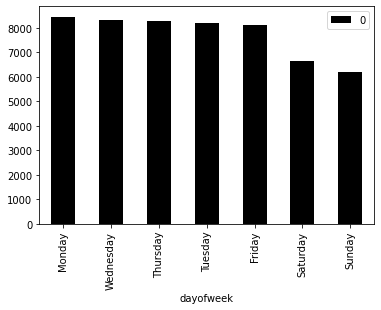

In [5]:
#utilizando do value counts para soma de todos os valores
recebidos_semana = df.value_counts(df['dayofweek'])

#transformando a series em data frame
recebidos_semana = pd.DataFrame(recebidos_semana)

#criando o grafico e colocando a cor azul nas barras
recebidos_semana.plot.bar(color = 'black')

## Questão 2

<AxesSubplot:ylabel='0'>

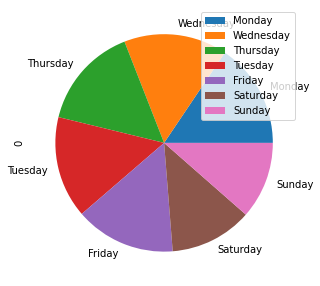

In [7]:
#utilizando do data frame feito anteriormente e utilizando da biblioteca plot, fazemos um grafico pizza
recebidos_semana.plot.pie(y=0, figsize=(5, 5))

<AxesSubplot:ylabel='0'>

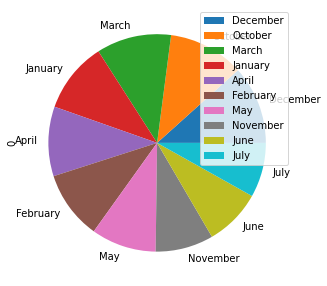

In [9]:
#utilizando do data frame feito anteriormente e utilizando da biblioteca plot, fazemos um grafico pizza
recebidos_mes.plot.pie(y=0, figsize=(5, 5))

<AxesSubplot:ylabel='0'>

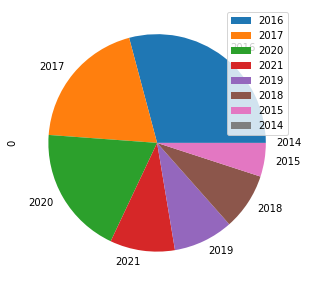

In [10]:
#utilizando do data frame feito anteriormente e utilizando da biblioteca plot, fazemos um grafico pizza
recebidos_ano.plot.pie(y=0, figsize=(5, 5))

## Percebemos que apenas no gráfico de anos que temos uma variação notável, com o ano de 2016 liderando na frente.

## Questão 3

<AxesSubplot:>

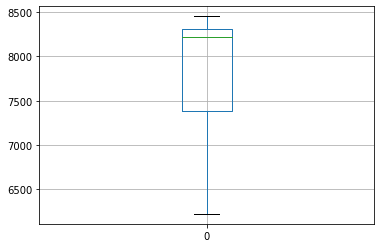

In [11]:
#utilizando novamente da biblioteca plot para fazemos o boxplot
recebidos_semana.boxplot()

<AxesSubplot:>

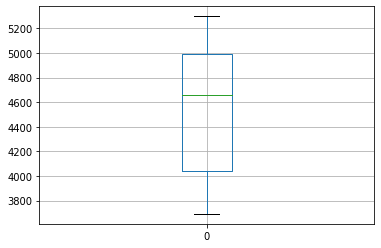

In [12]:
#utilizando novamente da biblioteca plot para fazemos o boxplot
recebidos_mes.boxplot()

<AxesSubplot:>

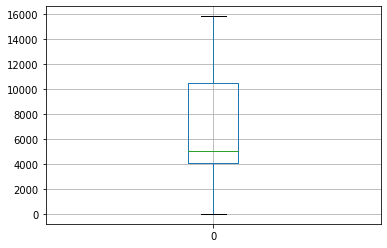

In [13]:
#utilizando novamente da biblioteca plot para fazemos o boxplot
recebidos_ano.boxplot()

## Percebemos que nao existe nenhum outlier nos 3 dados analisados anteriormente.

## Questão 4

<AxesSubplot:xlabel='Horas'>

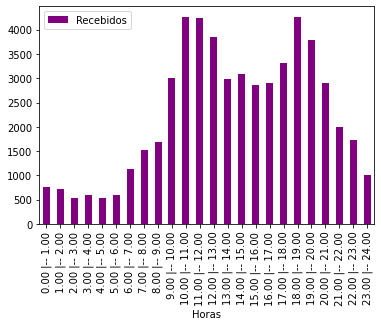

In [14]:
#utilizando da funçao de distribuiçao de classes feita na segunda lista da nossa cadeira
def dist_frequencia_classes(x, nc='auto'):
    fa,classes= np.histogram(x, bins=nc) 
    fa = fa.astype(int)
    classe_str = []
    for i in range(len(classes)):
        if i<=len(classes)-2:
            classe_str.append('{:2.2f} |-- {:2.2f}' .format(classes[i],classes[i+1]))
        else:
            break        
    return pd.DataFrame({'Horas':classe_str, 'Recebidos': fa}).set_index('Horas')

#criando uma varivael selecionando apenas a coluna da hora no dia
timeofday = df['timeofday']

#criando uma variavel na qual estará dentro dela o data frame passado na funçao, criando assim a frequencia
horas = dist_frequencia_classes(timeofday,nc=24)

#criando o grafico com a biblieoteca plot e colocando a cor roxa no grafico
horas.plot.bar(color = 'purple')

## Questão 5

<AxesSubplot:xlabel='from'>

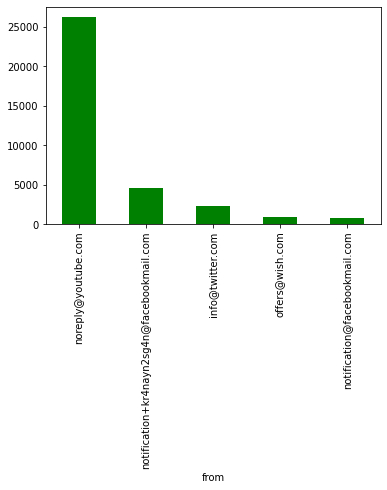

In [15]:
#variavel criada com value counts e uso da funçao head para pegar os 5 primeiros que mais aparecem 
maior_frequencia = df.value_counts(df['from']).head(5)

#grafico criado com a biblioteca plot e atribuiçao da cor verde
maior_frequencia.plot.bar(color = 'green')

## Questão 6

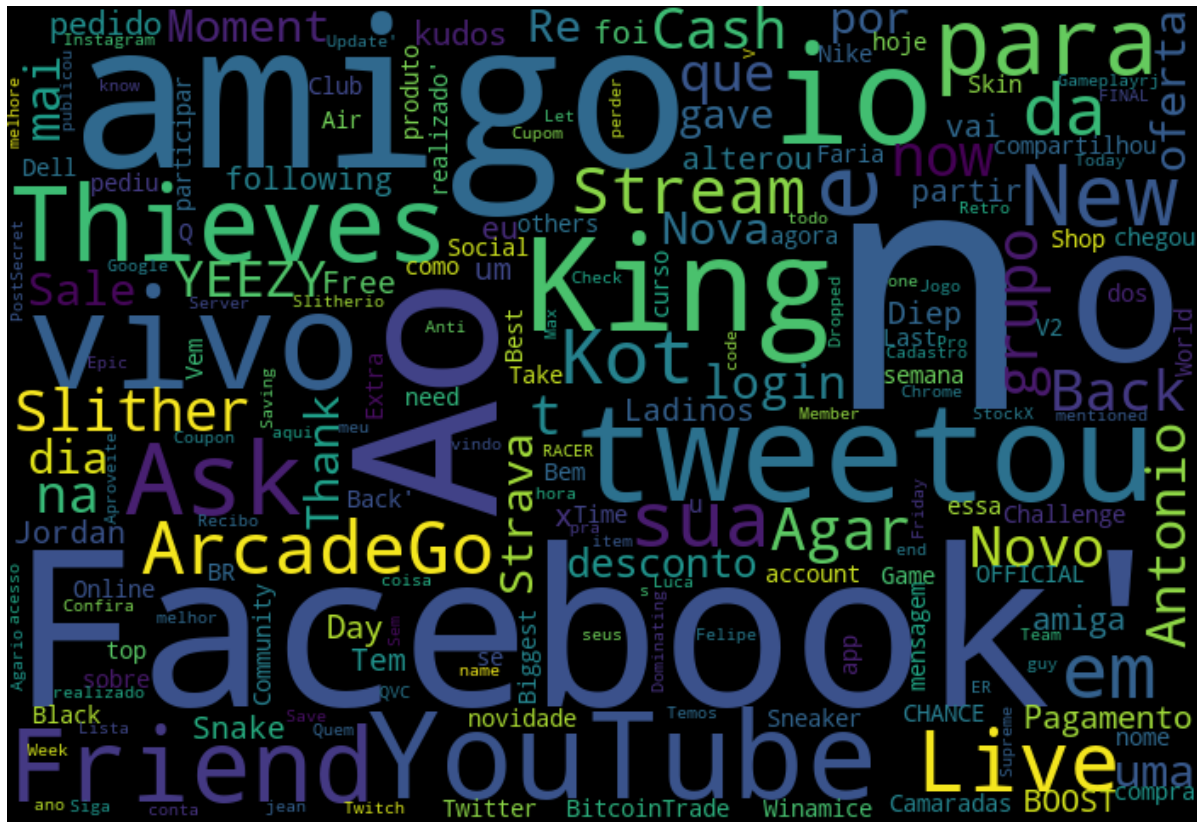

In [16]:
#criando lista vazia para colocar os emails validos 
lista_assunto = []

#seleçao da coluna com assuntos
subject = df['subject']

#for para limpar todos os emails com assuntos indesejaveis
for c in subject:
    if "UTF-8" not in c:
        if "utf-8" not in c:
            if 'windows' not in c:
                if 'ISO' not in c:
                    if 'noreply' not in c:
                        if 'adidas' not in c:
                            lista_assunto.append(c)
    else:
        continue

#tranformando a lista em um dataframe 
lista_assunto = pd.DataFrame(lista_assunto)

#juntando todas as palavras do dataframe criada
text = ' '.join(map(str, lista_assunto.values))

#palavras que se repetem muito e nao queremos que apareça na nuvem de palavras
stopwords = ['de','seu','quer','ser']

#limitando as dimensoes da nuvemn
wrd = WordCloud(width=700, height=480, margin=0, collocations=False)

#excluindo as palavras da nuvem que escrevemos anteriormente
for sw in stopwords:
    wrd.stopwords.add(sw)
wordcloud = wrd.generate(text)

#printando com a biblioteca plot
plt.figure(figsize=(25,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)

## Questão 7

## 7.1) Crie um gráfico de anos e extraia informações sobre

<AxesSubplot:xlabel='year'>

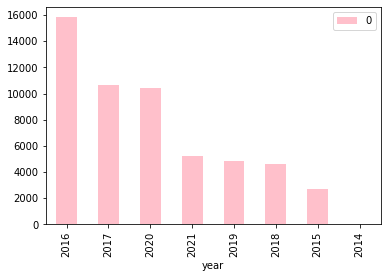

In [17]:
#criando grafico com a biblioteca plot e atribuindo a cor rosa
recebidos_ano.plot.bar(color=['pink'])

#### Vemos que 2016 comparado a 2015 teve um crescimento gigantesco, até 2015 eu usava o celular de meus pais, no final de 2015, recebi no natal meu celular e comecei a cadastrar em varios locais, por isso o crecimento tao grande!


#### Também é perceptivel o crescimento de 2019 para 2020, ano que ficamos em casa e descobrimos muitos locais de entretenimento na qual cadastramos nosso emails.

## 7.2) Crie um gráfico com os assuntos mais recebidos no seu email:

<AxesSubplot:ylabel='0'>

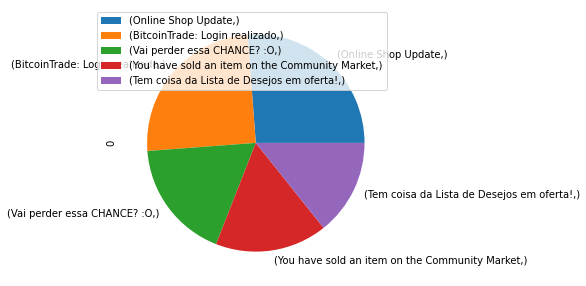

In [18]:
#criando dataframe com value counts, para mostrar os que mais apareceme utilizando da funçao head para pegar os 5 primeiros
assuntos_recebidos = pd.DataFrame(lista_assunto.value_counts().head(5))

#criando grafico pizza
assuntos_recebidos.plot.pie(y=0, figsize=(5, 5))